In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

C:\Users\LOVE\AppData\Local\Temp\ipykernel_17864\1283938912.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 선형회귀 실습 2

1. seaborn 내장 데이터셋 불러오기

In [3]:
tips_df = sns.load_dataset('tips')
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


2. 데이터 시각화: 산점도

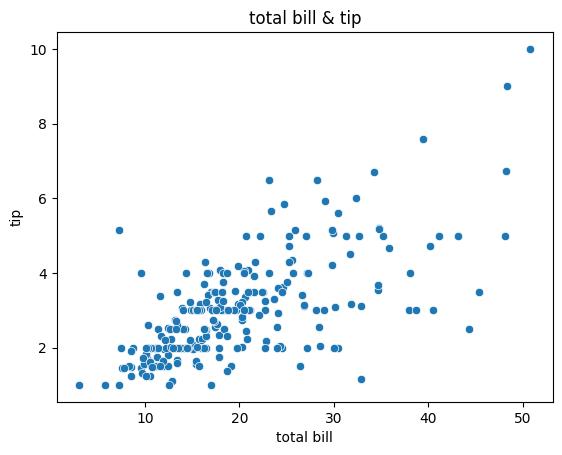

In [4]:
sns.scatterplot(data = tips_df, x = 'total_bill', y = 'tip')
plt.title('total bill & tip')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.show()

3. 선형회귀 훈련(적합)

In [5]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

x = tips_df[['total_bill']]
y = tips_df[['tip']]

model_lr.fit(x, y)

LinearRegression()

In [6]:
# 가중치(w1) 확인, 변수에 지정
print(model_lr.coef_)
w1 = model_lr.coef_[0][0]

# 편향(bias, w0) 확인
print(model_lr.intercept_)
w0 = model_lr.intercept_[0]

# 수식 확인
print('y = {}x + {}'.format(w1.round(2), w0.round(2)))

[[0.10502452]]
[0.92026961]
y = 0.11x + 0.92


결론: 총결제금액이 1$ 오를 때, 팁은 0.11$ 추가된다.

4. 위 함수식을 활용하여 예측값 추가

In [7]:
y_true = tips_df['tip']
y_pred = model_lr.predict(tips_df[['total_bill']])

5. 모델 평가

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_true, y_pred)

1.036019442011377

In [9]:
r2_score(y_true, y_pred)

0.45661658635167657

6. 시각화

In [10]:
tips_df['pred'] = y_pred
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835


<Axes: xlabel='total_bill', ylabel='tip'>

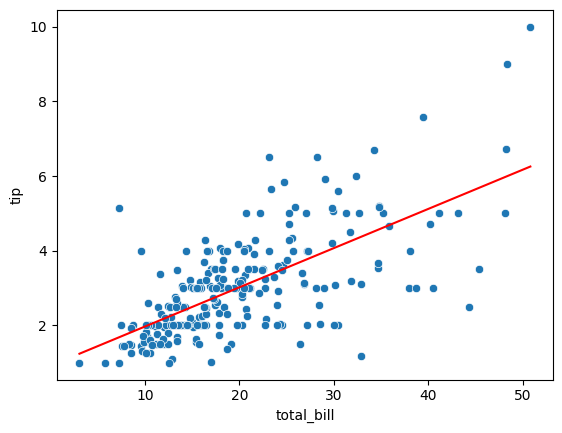

In [11]:
sns.scatterplot(data = tips_df, x ='total_bill', y = 'tip')
sns.lineplot(data = tips_df, x = 'total_bill', y = 'pred', color = 'red')

성별, 흡연 유무 등 다른 변수에 대한 추가 분석 필요
→ 다중선형회귀 분석 진행

7. 범주형 데이터 사용하기

In [17]:
def get_sex(x):
    if x == 'Female':
        return 0
    else:
        return 1
    
tips_df['sex_en'] = tips_df['sex'].apply(get_sex)
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,pred,sex_en
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,0
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1


8. 훈련

In [20]:
model_lr2 = LinearRegression()

x = tips_df[['total_bill', 'sex_en']]
y = tips_df[['tip']]

model_lr2.fit(x, y)

LinearRegression()

9. 예측

In [23]:
y_pred2 = model_lr2.predict(x)

10. 평가

In [25]:
# 단순선형회귀 mse (x = total bill)
print('단순선형회귀', mean_squared_error(y_true, y_pred))

# 다중선형회귀 mse (x = total bill, sex)
print('다중선형회귀', mean_squared_error(y_true, y_pred2))

단순선형회귀 1.036019442011377
다중선형회귀 1.0358604137213616


In [26]:
# 단순선형회귀 mse (x = total bill)
print('단순선형회귀', r2_score(y_true, y_pred))

# 다중선형회귀 mse (x = total bill, sex)
print('다중선형회귀', r2_score(y_true, y_pred2))

단순선형회귀 0.45661658635167657
다중선형회귀 0.45669999534149963
